In [1]:
import numpy as np
import pandas as pd
from rdkit import Chem
import rdkit
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
import pandas as pd
from rdkit.Chem import PandasTools

In [2]:
file_name = 'smile.txt'

with open(file_name, "r") as ins:
    smiles = []
    for line in ins:
        smiles.append(line.split('\n')[0])
print('# of SMILES:', len(smiles))

# of SMILES: 11


In [3]:
mols = [Chem.MolFromSmiles(smi) for smi in smiles]

[16:06:27] SMILES Parse Error: syntax error while parsing: smiles
[16:06:27] SMILES Parse Error: Failed parsing SMILES 'smiles' for input: 'smiles'


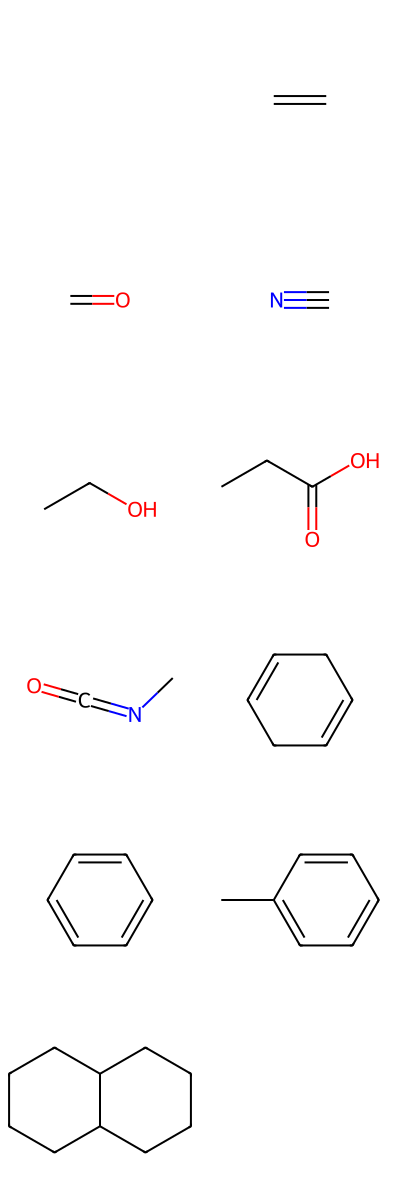

In [4]:
Draw.MolsToGridImage(mols, molsPerRow=2, subImgSize=(200, 200))

In [5]:
url = './smile.txt'
esol_data = pd.read_csv(url)

In [6]:
PandasTools.AddMoleculeColumnToFrame(esol_data, smilesCol='smiles')

In [7]:
esol_data["n_Atoms"] = esol_data['ROMol'].map(lambda x: x.GetNumAtoms())
esol_data.head(1)

,smiles,ROMol,n_Atoms
0,C=C,<rdkit.Chem.rdchem.Mol object at 0x1501ecb03660>,2


In [8]:
from psikit import Psikit
pk=Psikit(debug=True,threads=1,memory=12)


  Memory set to  11.176 GiB by Python driver.
  Threads set to 1 by Python driver.


In [9]:
def calc_en(s):
    pk.read_from_smiles(s)
    %time
    ene=pk.optimize()
    return ene

In [10]:
esol_data['energy']=0

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 6.68 µs
Optimizer: Optimization complete!
CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.87 µs
Optimizer: Optimization complete!
CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 5.72 µs
Optimizer: Optimization complete!
CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.72 µs
Optimizer: Optimization complete!
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs
Optimizer: Optimization complete!
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs
Optimizer: Optimization complete!
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.48 µs
Optimizer: Optimization complete!
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.87 µs
Optimizer: Optimization complete!
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs
Optimizer: Optimization complete!
CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 5.72 µs
Optimizer: Optimization complete!


,smiles,ROMol,n_Atoms,energy
0,C=C,,2,-78.038769
1,C=O,,2,-113.869536
2,C#N,,2,-92.876942
3,CCO,,3,-154.089919
4,CCC(=O)O,,5,-266.858985
5,CN=C=O,,4,-206.795593
6,C1=CCC=CC1,,6,-231.846762
7,C1=CC=CC=C1,,6,-230.713524
8,C1=C(C)C=CC=C1,,7,-269.753552
9,C1CCC2CCCCC2C1,,10,-389.204842

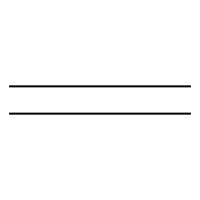
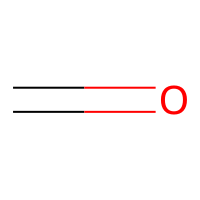
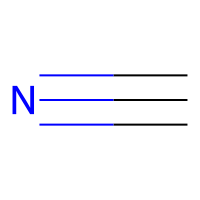
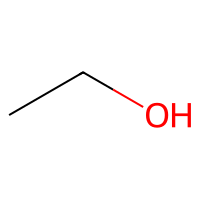
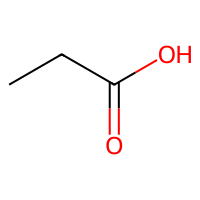
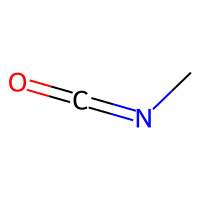
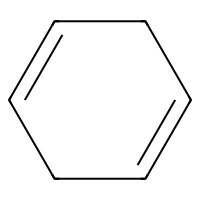
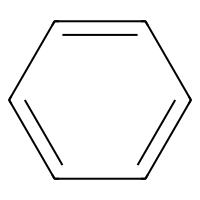
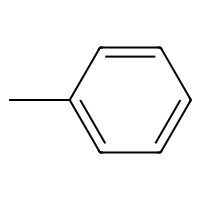
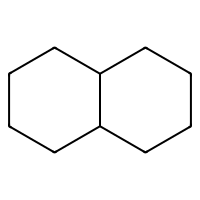

In [11]:
for i in range(len(esol_data)):
    smi = str(esol_data.iloc[i,0])
    esol_data.iloc[i,3]=calc_en(smi)
esol_data    

In [12]:
esol_data.to_csv('./result.csv',index=None)